In [1]:
import os
import gensim
from gensim.models import Word2Vec
import pandas as pd

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import re
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [4]:
from sklearn.manifold import TSNE

In [5]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

In [6]:
# Define the path to the directory containing the text files
path = '/Users/hernanadasme/Projects/estadio_1940_1980/estadio_pdfs/clean_txts_1958_2'

# Read in the text files and create a list of long strings
corpus = []
for filename in os.listdir(path):
    with open(os.path.join(path, filename), "r", encoding="utf-8") as f:
        text = f.read()
        corpus.append(text)

In [7]:
# create a pandas DataFrame with one row per txt file
df_es_1958 = pd.DataFrame({'page_text': corpus})

In [8]:
# define preprocessing function
def preprocess_text(text):
    # convert text to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^\w\s]','',text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    text = ' '.join([word for word in text.split() if len(word) > 1])
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    # remove _ characters
    text = text.replace('_', '')
    # remove whitespace
    text = re.sub(r'\s+', ' ', text)
    
    return text

In [9]:
# apply preprocessing function to text column
df_es_1958['page_text'] = df_es_1958['page_text'].apply(lambda x: preprocess_text(x))

In [16]:
df_es_1958.head()

,page_text
0,potentes seguras económicas más barata económi...
1,ss sí jn cuatro días universidad católicaprod...
2,deténgalocon ar zl viene delapagevio más armad...
3,oelviernes rí selsábado viajessintrasbordo de ...
4,juntoalloroquelerecuerda sus no chesdegloria j...


In [11]:
# create a list of lists where each list contains the preprocessed tokens of each text
corpus_1958 = [doc.split() for doc in df_es_1958['page_text'].tolist()]

In [12]:
corpus_1958[0]

['potentes',
 'seguras',
 'económicas',
 'más',
 'barata',
 'económica',
 'de',
 'chile',
 'kmsporlitro',
 'velocidades',
 'consulte',
 'nuestroplandeventas',
 'servicio',
 'repuestos',
 'sy',
 'cía',
 'ltda',
 'alameda',
 'fono',
 'empresa',
 'hasta',
 'nido',
 'siempre',
 'rá',
 'porcompras',
 'mayoresde',
 'hay',
 'descuentos',
 'especiales',
 'squeñosdetalles',
 'degirosycurvas',
 'fijarlos',
 'en',
 'el',
 'recuerdo',
 'sinosoycapazdeanticipar',
 'lallegada',
 'deunrecodoantesdeque',
 'éste',
 'en',
 'treenelámbito',
 'delaluzproducida',
 'por',
 'mistaróles',
 'deduzcoquenoestoylosuíicientementefamiliarizadoconesacurvayvuelvo',
 'arepetirlaoperaciónlanochesiguiente',
 'reciénentoncesesbozo',
 'unprograma',
 'para',
 'lacarrera',
 'estableciendo',
 'por',
 'ejemplocuántas',
 'revoluciones',
 'usaréencadarecta',
 'cosaqueconsulto',
 'conmismecánicos',
 'esto',
 'estodoloquenecesito',
 'esto',
 'unpocodesuerte',
 'muchos',
 'volante',
 'sus',
 'anamuletosdebuenafortunaomascotasespec

In [17]:
# train a word2vec model on the corpus
model = Word2Vec(corpus_1958, size=100, window=5, sg=1, min_count=1, workers=8)

# get the vocabulary of the model
vocab = model.wv.vocab.keys()

In [18]:
# get the vector representation of a word
vec = model.wv['chance']

# find the most similar words to a given word
similar_words = model.wv.most_similar('chance')

In [19]:
similar_words

[('arsenal', 0.9916836023330688),
 ('unoera', 0.9916359186172485),
 ('marítima', 0.9916149377822876),
 ('niño', 0.9915151596069336),
 ('sm', 0.9914880990982056),
 ('lasegunda', 0.9914408326148987),
 ('medina', 0.9914347529411316),
 ('julioy', 0.9912565350532532),
 ('poretti', 0.9910814762115479),
 ('marión', 0.9910546541213989)]

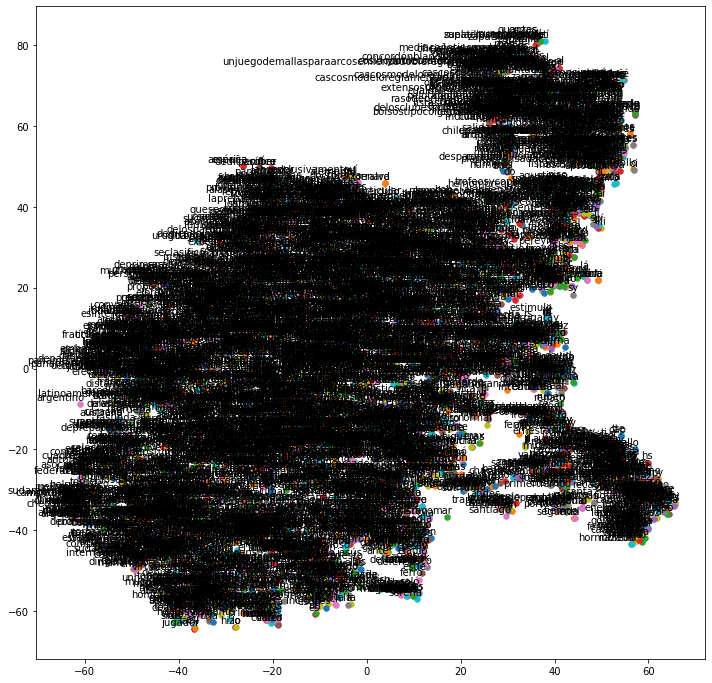

In [49]:
# Get the vocabulary and corresponding vectors
words = list(model.wv.vocab)
vectors = model.wv[words]

# Use t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2)
vectors_tsne = tsne.fit_transform(vectors)

# Plot the embeddings in a scatter plot
fig, ax = plt.subplots(figsize=(12, 12))
for word, coord in zip(words, vectors_tsne):
    ax.scatter(coord[0], coord[1], s=30)
    ax.annotate(word, xy=(coord[0], coord[1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

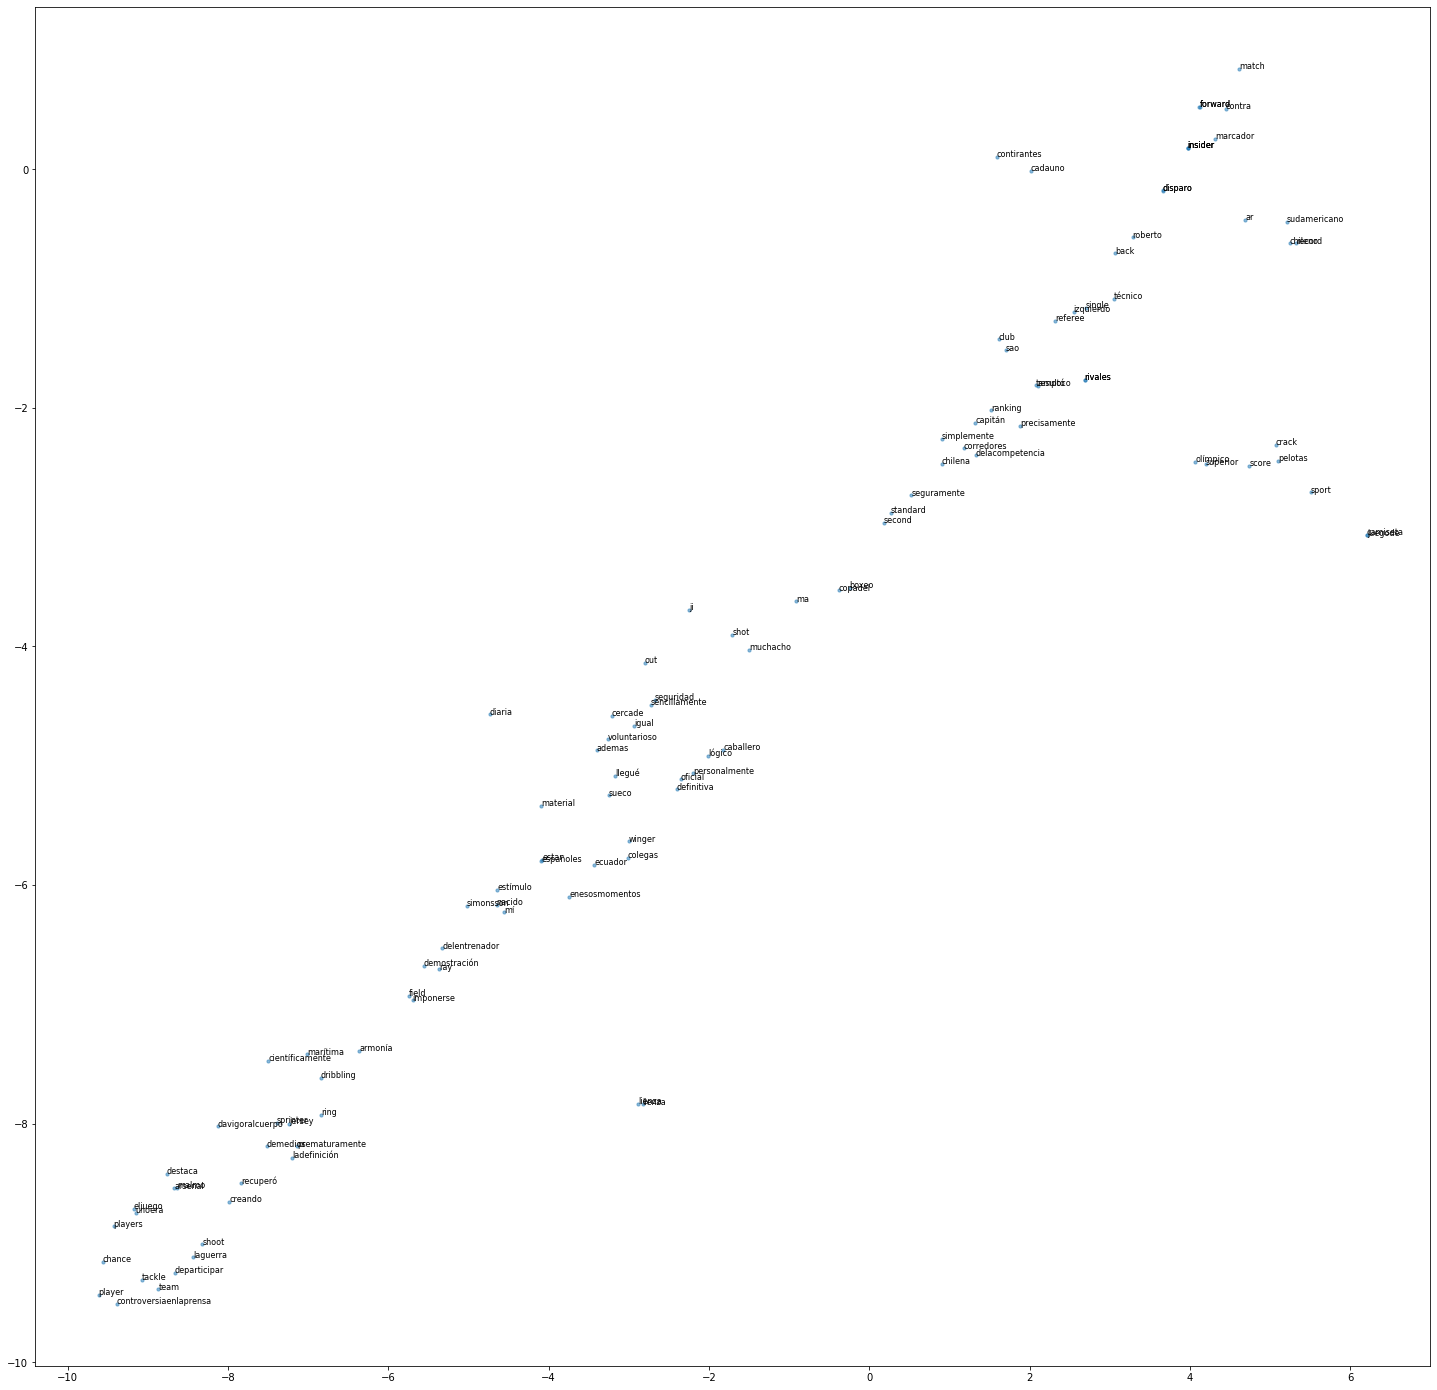

In [23]:
# Define the set of words for which you want to find similar words
target_words = ['chance', 'sprinter', 'ring',
             'forward', 'tackle', 'shot', 'out', 'single', 'crack', 'referee', 
              'sport', 'player', 'standard', 'score', 'team', 
              'jersey', 'dribbling', 'record', 'shoot', 'back', 
              'insider', 'winger', 'players', 'field', 
              'second', 'ranking', 'match', 'club']

# Get the vectors for the target words and their similar words
word_vectors = []
labels = []
for word in target_words:
    similar_words = [w[0] for w in model.wv.most_similar(word, topn=3)]
    word_vectors.append(model.wv[word])
    labels.append(word)
    for similar_word in similar_words:
        word_vectors.append(model.wv[similar_word])
        labels.append(similar_word)

# Reduce the dimensionality of the word vectors to two using t-SNE
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot the word vectors
plt.figure(figsize=(25, 25))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], s=10, alpha=0.5)
for i, label in enumerate(labels):
    plt.annotate(label, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=8)
plt.show()